# pytorch

In [2]:
import torch

print(torch.__version__)


2.5.1


In [6]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



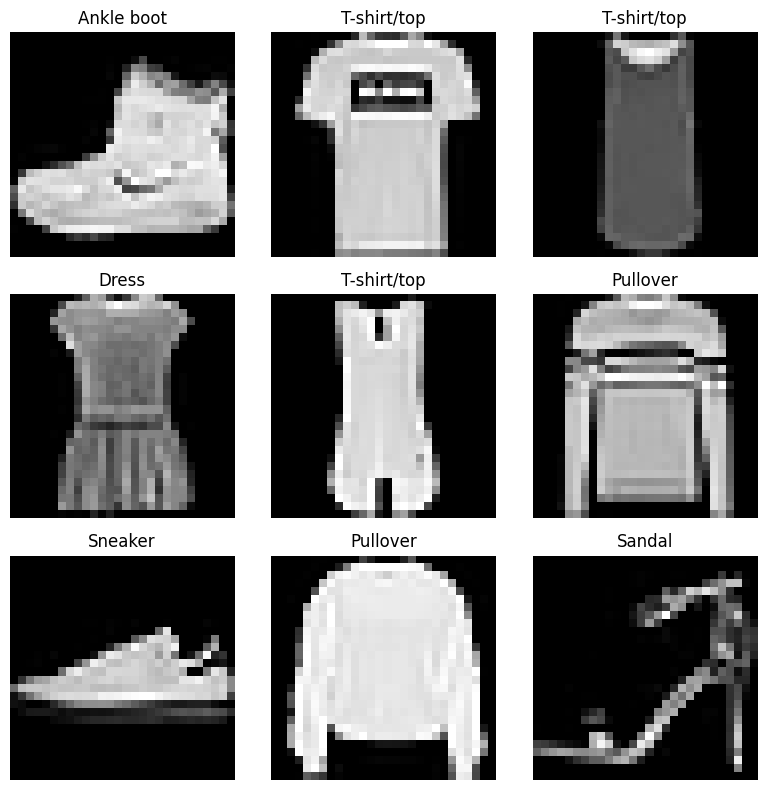

In [7]:
# 显示多张图片
fig = plt.figure(figsize=(8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    image, label = training_data[i]
    image = image.squeeze()
    ax.imshow(image, cmap='gray')
    ax.set_title(f'{training_data.classes[label]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


In [9]:
batch_size = 64

In [10]:
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X,y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [12]:
class NeuralNetWork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetWork().to(device)
print(model)

NeuralNetWork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
   size = len(dataloader.dataset) 
   print(f"size: {size}")
   model.train()
   for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss = loss_fn(pred, y)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      if batch % 100 == 0:
         loss, current = loss.item(), batch * len(X)
         print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
   size = len(dataloader.dataset)
   num_batches = len(dataloader)
   model.eval()
   test_loss, correct = 0, 0
   with torch.no_grad():
      for X, y in dataloader:
         X, y = X.to(device), y.to(device)
         pred = model(X)
         test_loss += loss_fn(pred, y).item()
         correct += (pred.argmax(1) == y).type(torch.float).sum().item()
   test_loss /= num_batches
   correct /= size
   print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs =5
for i in range(epochs):
   print(f"Epoch {i+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
size: 60000
loss: 2.308556 [    0/60000]
loss: 2.299555 [ 6400/60000]
loss: 2.273777 [12800/60000]
loss: 2.266942 [19200/60000]
loss: 2.248147 [25600/60000]
loss: 2.219013 [32000/60000]
loss: 2.223107 [38400/60000]
loss: 2.185959 [44800/60000]
loss: 2.190187 [51200/60000]
loss: 2.166417 [57600/60000]
Test Error: 
 Accuracy: 39.6%, Avg loss: 2.151647 

Epoch 2
-------------------------------
size: 60000
loss: 2.161025 [    0/60000]
loss: 2.159888 [ 6400/60000]
loss: 2.091880 [12800/60000]
loss: 2.110347 [19200/60000]
loss: 2.062400 [25600/60000]
loss: 2.004329 [32000/60000]
loss: 2.026750 [38400/60000]
loss: 1.946640 [44800/60000]
loss: 1.952665 [51200/60000]
loss: 1.893828 [57600/60000]
Test Error: 
 Accuracy: 54.9%, Avg loss: 1.877852 

Epoch 3
-------------------------------
size: 60000
loss: 1.910156 [    0/60000]
loss: 1.891105 [ 6400/60000]
loss: 1.756327 [12800/60000]
loss: 1.800332 [19200/60000]
loss: 1.702034 [25600/60000]
loss: 1.651125 